<a href="https://colab.research.google.com/github/mamikah/DeepLearning2022Late/blob/main/DogVsCat0927.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kerasを使用したディープラーニングをやってみる

## 画像認識

In [1]:
%matplotlib inline
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
model = VGG16( weights = 'imagenet' )

553476096/553467096 [==============================] - 9s 0us/step


### 画像判定のための関数

In [3]:
def predict( filename, featuresize ):
  img = image.load_img( filename, target_size=( 224,224 ) )
  x = image.img_to_array( img )
  x = np.expand_dims( x, axis=0 )
# 判定を実行
  preds = model.predict( preprocess_input( x ) )
  results = decode_predictions( preds, top=featuresize )[0]
  return results

### 画像表示のための関数

In [4]:
def showimg( filename, title, i ):
  im = Image.open( filename )
  im_list = np.array( im )
  plt.subplot( 2, 5, i )
  plt.title( title )
  plt.axis( "off" )
  plt.imshow( im_list )


### Kaggleにある画像データを利用する
Kaggle------>https://www.kaggle.com/<br>
犬猫判定用の画像データ<br>
----->https://www.kaggle.com/c/dogs-vs-cats/data

### 指定されたURLからファイルをダウンロードする

In [5]:
# wgetでwebからファイルをダウンロードする
# GoogleColabでコマンドを実行するときは先頭に！マークを付ける
# 小さいファイルをgoogleドライブからDLするときは以下のほうにURLを付けるだけでOK
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt



--2022-10-04 00:34:24--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 108.177.112.102, 108.177.112.138, 108.177.112.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.112.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ehb1rss699h79sl6o8q8cs96bh31k9r1/1664843625000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=1dd64932-d47a-47c2-b283-f975106d6c85 [following]
--2022-10-04 00:34:24--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ehb1rss699h79sl6o8q8cs96bh31k9r1/1664843625000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=1dd64932-d47a-47c2-b283-f975106d6c85
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 142.251

### Colabに自分のGoogleアカウントのドライブをマウントする

In [6]:
from google.colab import drive
# googleドライブをマウント
drive.mount('/content/drive')

Mounted at /content/drive


### DLしてきたファイルをマウントしたディレクトリにコピーする

In [7]:
# コピーファイルを置くディレクトリの作成
import os
dir_path = '/content/drive/My Drive/2022LATE'
# すでにディレクトリがあってもエラーにしない
os.makedirs( dir_path, exist_ok=True )
!pwd #今いるディレクトリを表示
# ファイルをコピー
!cp train.zip '/content/drive/My Drive/2022LATE'
# test.zipはいったん使わないのでコピーしない

/content


### GoogleドライブからColabへファイルをコピー

In [8]:
!cp '/content/drive/My Drive/2022LATE/train.zip'

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/train.zip'
Try 'cp --help' for more information.


### zipファイルを解凍

In [9]:
# unzipで解凍
!unzip -o -q 'train.zip'
print('OK!')

OK!


### 解凍した画像を使って画像判定させる

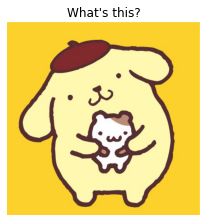

('n02834397', 'bib', 0.49514613)
('n03291819', 'envelope', 0.10976662)
('n03595614', 'jersey', 0.06986626)
('n03908618', 'pencil_box', 0.017414322)
('n04579432', 'whistle', 0.013718662)
('n04317175', 'stethoscope', 0.011986805)
('n03532672', 'hook', 0.01160268)
('n07248320', 'book_jacket', 0.011550691)
('n03709823', 'mailbag', 0.0109565295)
('n03485794', 'handkerchief', 0.008287496)


In [11]:
# 画像を指定する変数
filename = 'pomu.jpg'
plt.figure( figsize=(20,10) )
for i in range(1):
  showimg(filename,"What's this?", i+1)
plt.show()

# 表示した画像を判定
results = predict(filename, 10)
for  result in results:
  print(result)